<a href="https://www.kaggle.com/code/jarredpriester/detecting-faces-using-opencv?scriptVersionId=113950481" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Detecting Faces Using OpenCV

### by Jarred Priester
### 12/15/2022

1. Introduction
2. Downloads
3. Detecting our First Face
4. Creating Functions
5. Detecting Faces
6. Conclusion


# 1. Introduction

The purpose of this notebook will be to learn how to implement the python library OpenCV in order to detect faces in images. We will be using a dataset of images that I put together to use as facial recognition practice. The images have a variety of different facial angles. I was trying to find a few edge cases to see if we would be able to detect those faces or not.

OpenCV uses a Cascade Classifier algorithm that instead of classifying all the image features at once, the algorithm groups the features into stages and applies the classification one at a time. If the features meet the classification criteria it gets moved onto the next classifications stage. If it passes all of them it is considered a face. If at any stage the features don't pass classification it gets discarded and the algorithm moves onto the next group of features. This saves a lot of computation time!

More on OpenCV can be found [here](https://opencv.org/)  
More on Cascade Classifer can be found [here](https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html)

The ethics of facial recognition is a very interesting subject that I suggest everyone who is interested in computer vision to look into at some point. I won't be covering the ethics of this technology in this notebook but I do encourage you to give it a read at some point.

Now let's detect faces!



# 2. Downloads

In [1]:
# importing the libaries we will be needing
import numpy as np # linear algebra
import cv2 as cv # opencv library we will be using for facial recognizion
import matplotlib.pyplot as plt # for visualization

In [2]:
# showing all the paths 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/haarcascade-frontalface-defaultxml/haarcascade_frontalface_default.xml
/kaggle/input/images-for-facial-recognition/Lex_Fridman.jpg
/kaggle/input/images-for-facial-recognition/Oprah.jpg
/kaggle/input/images-for-facial-recognition/babe_ruth.jpg
/kaggle/input/images-for-facial-recognition/landon_donovan.jpg
/kaggle/input/images-for-facial-recognition/France_WC2018_final.jpg
/kaggle/input/images-for-facial-recognition/Adele.jpg
/kaggle/input/images-for-facial-recognition/Mahatma_Gandhi.jpg
/kaggle/input/images-for-facial-recognition/Indian_cricket_team.jpg
/kaggle/input/images-for-facial-recognition/Janet_Yellen.jpg
/kaggle/input/images-for-facial-recognition/MLK.jpg
/kaggle/input/images-for-facial-recognition/Michael_Jordan.jpg
/kaggle/input/images-for-facial-recognition/graduation.jpg
/kaggle/input/images-for-facial-recognition/USA_basketball.jpg
/kaggle/input/images-for-facial-recognition/Albert_Einstein.jpg
/kaggle/input/images-for-facial-recognition/Nick_Bostrom.jpg


OpenCV's face recognition uses a pre-trained model which is stored in a xml file. We will need to download that file before we get started.

In [3]:
# downloading the opencv frontalface pretrained model
cascPath = "../input/haarcascade-frontalface-defaultxml/haarcascade_frontalface_default.xml"

# Create the haar cascade classifier
faceCascade = cv.CascadeClassifier(cascPath)

# 3. Detecting our First Face

Now that the pre-train model has been downloaded and the classifier set up it is time to download our first image. We will use the Landon Donovan image as our first trial run.

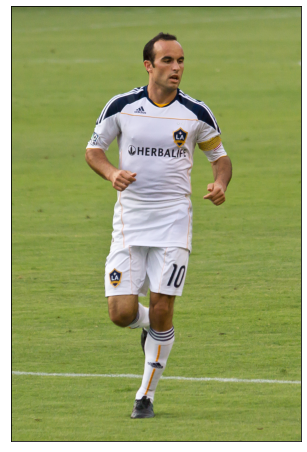

In [4]:
# downloading our first image, a photo of Landon Donovan
landon = cv.imread('../input/images-for-facial-recognition/landon_donovan.jpg')

# processing and showing the image
plt.figure(figsize=(8,8))
plt.imshow(cv.cvtColor(landon, cv.COLOR_BGR2RGB))
plt.xticks([])
plt.yticks([])
plt.show()

In [5]:
# Detect faces in the image
faces = faceCascade.detectMultiScale(
    landon,
    scaleFactor=1.8,
    minNeighbors=3,
    minSize=(30, 30),
    flags=None
)

In [6]:
print("Found {0} face!".format(len(faces)))

# Drawing a rectangle around the Landon's face
for (x, y, w, h) in faces:
    cv.rectangle(landon, (x, y), (x+w, y+h), (0, 255, 0), 2)

Found 1 face!


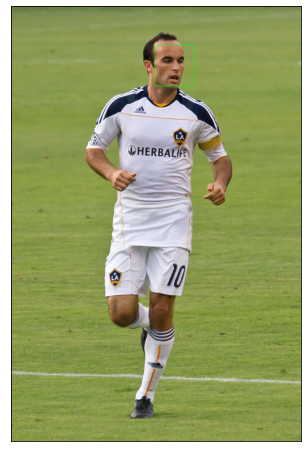

In [7]:
# processing and showing the image which should now have a box around his face
plt.figure(figsize=(8,8))
plt.imshow(cv.cvtColor(landon, cv.COLOR_BGR2RGB))
plt.xticks([])
plt.yticks([])
plt.show()

# 4. Creating Functions

We were successfully able to detect Landon's face! Next we will create two functions so that we don't have to write as much code the rest of the notebook.

In [8]:
def get_image(image):
    
    # showing the orginal image
    plt.figure(figsize=(8,8))
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [9]:
def face_detection(image, scale, neighbors ,size):
    # Detect faces in the image
    faces = faceCascade.detectMultiScale(
        image,
        scaleFactor=scale,
        minNeighbors= neighbors,
        minSize= size,
        flags=None
    )
    
    # printing out how many faces are found in the image
    if len(faces) > 1:
        print("{0} faces found!".format(len(faces)))
    elif len(faces) == 1:
        print("1 face found!")
    else:
        print("No faces found")

    # Drawing a rectangle around the face or faces
    for (x, y, w, h) in faces:
        cv.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    # showing the image which should have rectangles around the faces
    plt.figure(figsize=(8,8))
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.xticks([])
    plt.yticks([])
    plt.show()

# 5. Detecting Faces

The next seven images are similar to the Landon image in that the image is a photo of one person. The images have a pretty clear view of the front of the faces so detecting these should be straight forward.

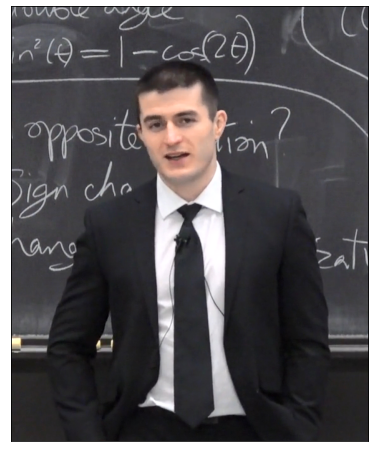

1 face found!


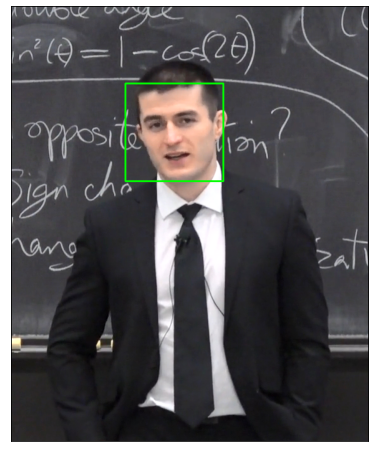

In [10]:
# downloading the image of Lex Fridman
lex = cv.imread('../input/images-for-facial-recognition/Lex_Fridman.jpg')

#showing the orginal image
get_image(lex)
plt.show()

#showing the image with facial detection
face_detection(lex, 1.6, 3, (30,30))
plt.show()

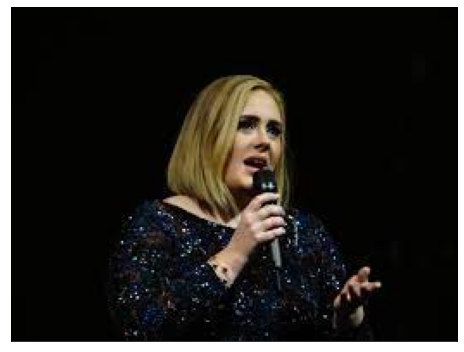

1 face found!


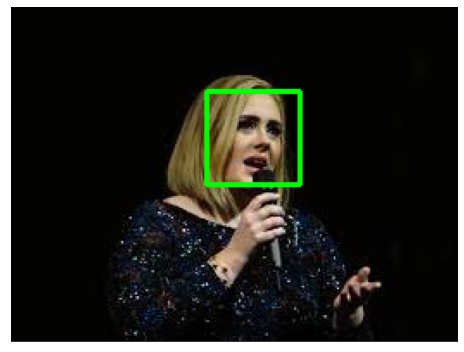

In [11]:
# downloading the images of Adele
adele = cv.imread('../input/images-for-facial-recognition/Adele.jpg')

# showing the orginal image
get_image(adele)
plt.show()

# showing the image with facial detection
face_detection(adele, 1.5, 3, (30,30))
plt.show()

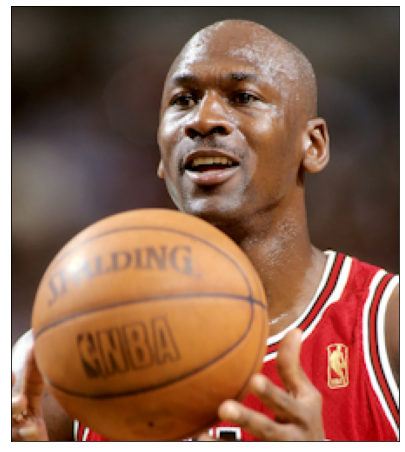

1 face found!


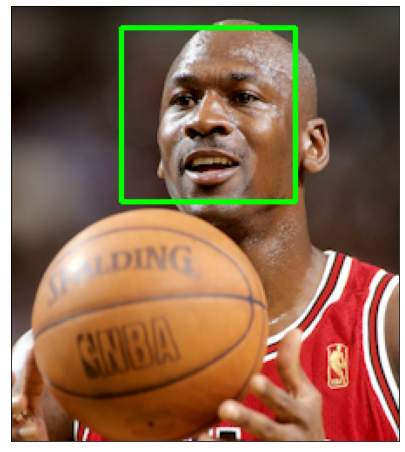

In [12]:
# downloading the image of Michael Jordan
jordan = cv.imread('../input/images-for-facial-recognition/Michael_Jordan.jpg')

# showing the orginal image
get_image(jordan)
plt.show()

# showing the image with facial detection
face_detection(jordan, 1.1, 3, (30,30))
plt.show()

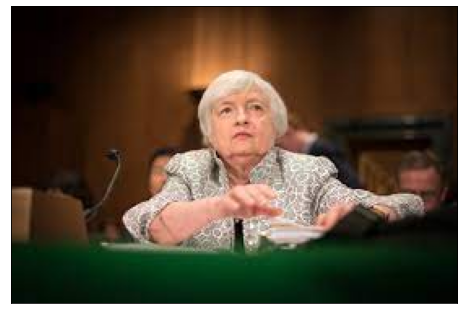

1 face found!


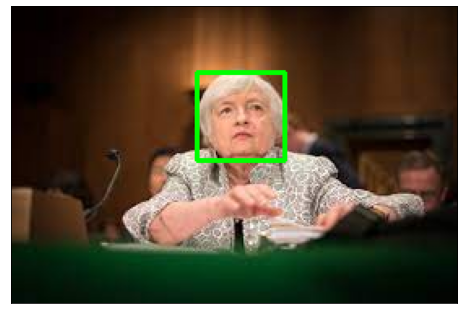

In [13]:
# downloading the image of Janet Yellen
janet = cv.imread('../input/images-for-facial-recognition/Janet_Yellen.jpg')

# showing the orginal image
get_image(janet)
plt.show()

# showing the image with facial detection
face_detection(janet, 1.5, 3, (30,30))
plt.show()

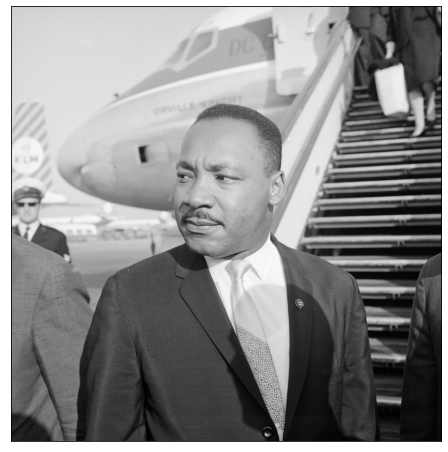

1 face found!


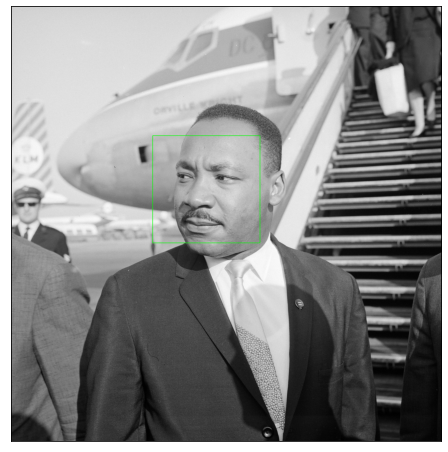

In [14]:
# downloading the image of MLK Jr
mlk = cv.imread('../input/images-for-facial-recognition/MLK.jpg')

# showing the orginal image
get_image(mlk)
plt.show()

# showing the image with facial detection
face_detection(mlk, 1.9, 3, (30,30))
plt.show()

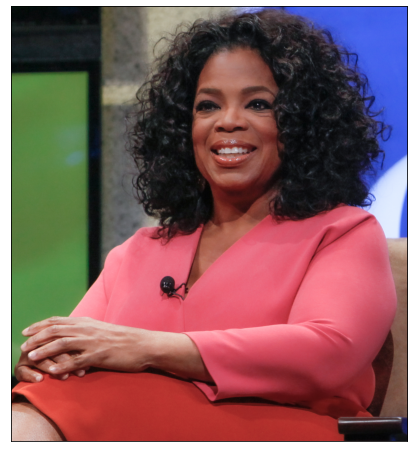

1 face found!


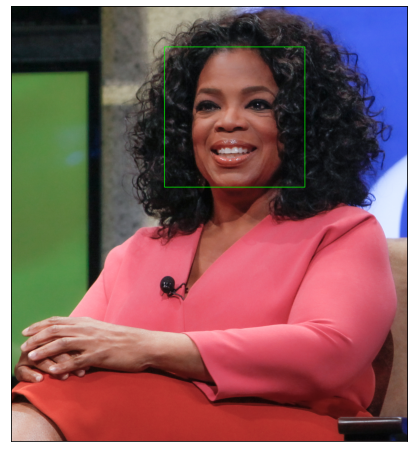

In [15]:
# downloading the image of Oprah
oprah = cv.imread('../input/images-for-facial-recognition/Oprah.jpg')

# showing the orginal image
get_image(oprah)
plt.show()

# showing the image with facial detection
face_detection(oprah, 1.5, 3, (30,30))
plt.show()

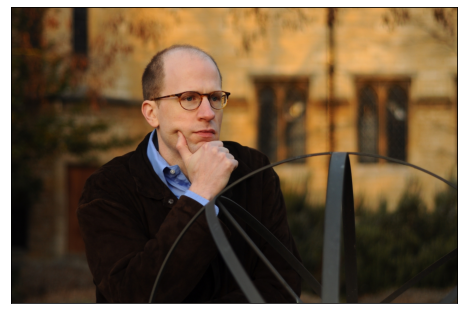

1 face found!


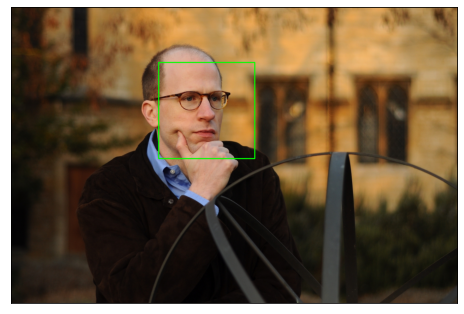

In [16]:
# downloading the image of Nick Bostrom
nick = cv.imread('../input/images-for-facial-recognition/Nick_Bostrom.jpg')

# showing the orginal image
get_image(nick)
plt.show()

# showing the image with facial detection
face_detection(nick, 1.1, 3, (30,30))
plt.show()

Well that worked quite well! Next we will still be looking at images with a single person but the full face are not quite in view.

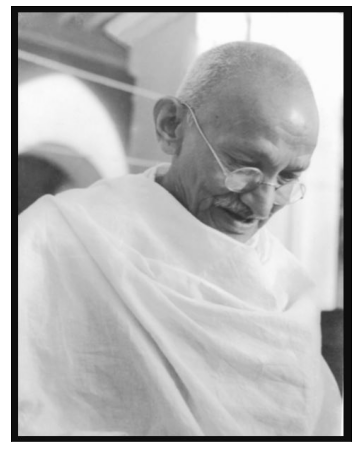

No faces found


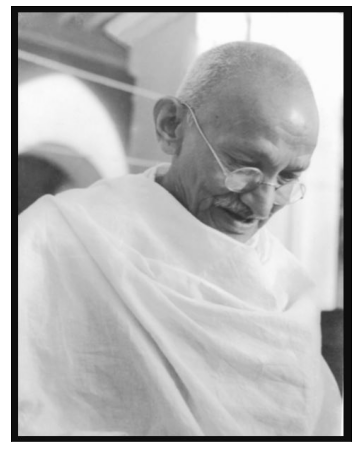

In [17]:
# downloading the image of gandhi
gandhi = cv.imread('../input/images-for-facial-recognition/Mahatma_Gandhi.jpg')

# show the orginal image
get_image(gandhi)
plt.show()

# showing the image with facial detection
face_detection(gandhi, 1.1, 3, (30,30))
plt.show()

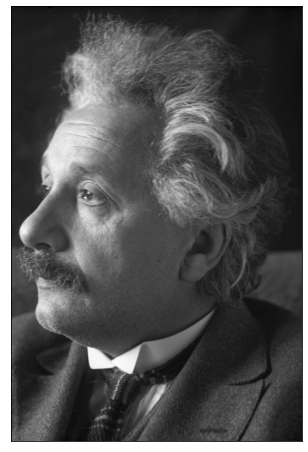

No faces found


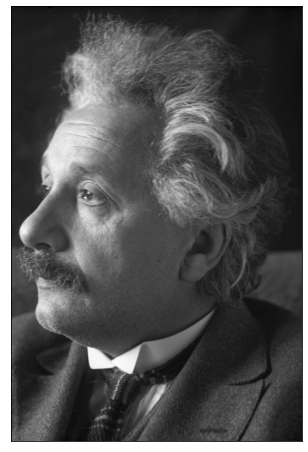

In [18]:
# downloading the image of Albert Einstein
albert = cv.imread('../input/images-for-facial-recognition/Albert_Einstein.jpg')

# showing the orginal image
get_image(albert)
plt.show()

# showing the image with facial detection
face_detection(albert, 1.1, 3, (30,30))
plt.show()

As you can see we were not able to detect the last two images. I was surpised that the classifier was not able to detect Gandhi's face. I say that because you can still see two eyes, a nose, and a mouth. The pre-trained model most likely did not have a lot of caes with this kind of an angle, that is my guess at least. I was not surprised that we were unable to detect the Einstein image due to the fact that you can only see half of his face and the pre-trained model seems to only be able to detect faces with a clear view of the whole face.

Next we will be looking at images that have multiple people in them. I am expecting that we should be able to correctly detect most but not all like we have seen in the previous images.

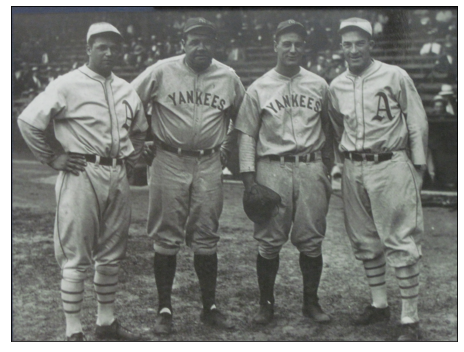

4 faces found!


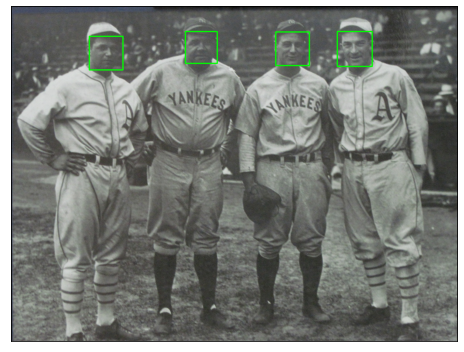

In [19]:
# downloading the image of Babe Ruth
ruth = cv.imread('../input/images-for-facial-recognition/babe_ruth.jpg')

# showing the orginal image
get_image(ruth)
plt.show()

# showing the image with facial detection
face_detection(ruth, 1.339, 3, (30,30))
plt.show()

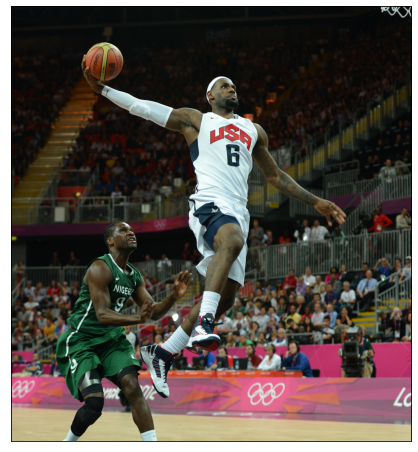

12 faces found!


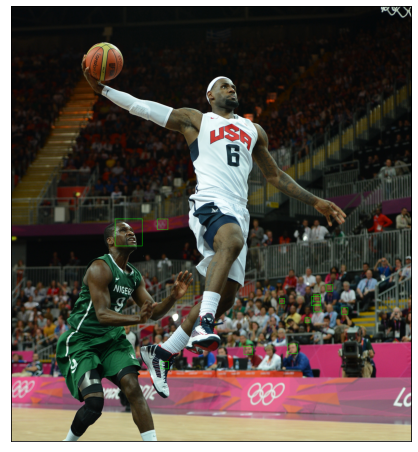

In [20]:
# downloading the image of USA basketball
usa = cv.imread('../input/images-for-facial-recognition/USA_basketball.jpg')

# showing the orginal image
get_image(usa)
plt.show()

# showing the image with facial detection
face_detection(usa, 1.1, 5, (30,30))
plt.show()

I find it interesting that it was able to pick up one basketball player but not both. I guess we are not able to see enough of Lebron's face. The classifier was able to pick up faces in the crowd even though they are in the background. That is pretty cool and I was not expecting that!

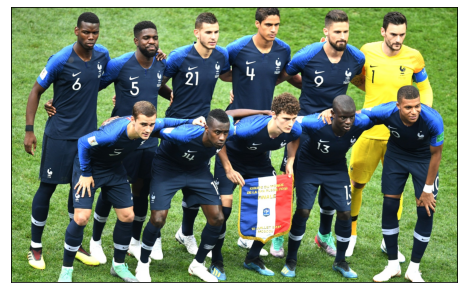

5 faces found!


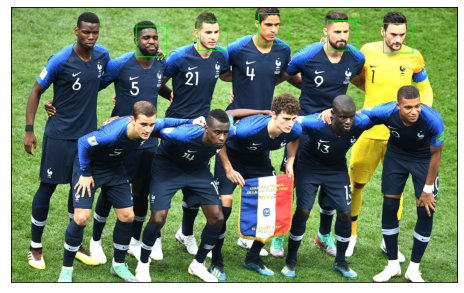

In [21]:
# downloading the image of the French national team
france = cv.imread('../input/images-for-facial-recognition/France_WC2018_final.jpg')

# showing the orginal image
get_image(france)
plt.show()

# showing the image with facial detection
face_detection(france, 1.1, 3, (120,120))
plt.show()

I am not quite sure why we are not able to detect Pogba's face. We were able to detect the rest of the back row but not the bottom row.

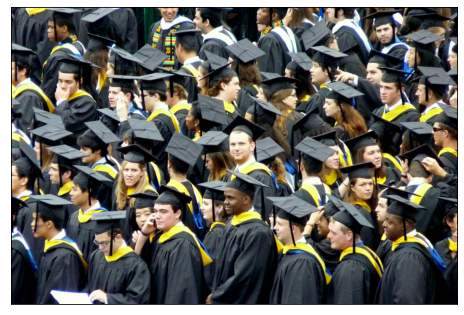

27 faces found!


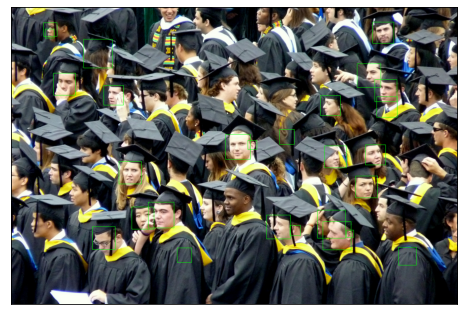

In [22]:
# downloading the image of a graduation
grads = cv.imread('../input/images-for-facial-recognition/graduation.jpg')

# showing the orginal image
get_image(grads)
plt.show()

# showing the image with facial detection
face_detection(grads, 1.1, 3, (30,30))
plt.show()

I think the classifier did a pretty good job at detecting most of the faces in the crowd. We can see a few false positives but overall it was able to detect the face that have a clear front view.

# 6. Conclusion

In this notebook we were able to download images, download OpenCV's facial recognition pre-trained model, create a cascade classifier, and create code that successfully detected faces in images. We found some cases where the classifier was not perfectly accurate but we also found cases that were perfectly accurate, giving us a better idea of what to expect when trying to detect faces in the future. I hope that by reading this notebook you leaned a little bit more about OpenCV and how to detect faces.

Thank you all for reading!